In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
import baselines
import get_movie_name as steven

In [3]:
from surprise import AlgoBase, Dataset, BaselineOnly, Reader, SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import cross_validate, train_test_split

In [137]:
def myround(x, base=.5):
    return base * round(x/base)

In [138]:
cv = baselines.cvWrapper(pd.read_csv('../data/movies/ratings.csv'))
cv.load_data()

In [139]:
algorithm_list = [SVD(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]
cv.cv(algorithm_list)

{'test_rmse': array([0.90515218, 0.89886728, 0.90778346]), 'fit_time': (3.5138139724731445, 4.147478103637695, 4.0622992515563965), 'test_time': (0.6602931022644043, 0.26169896125793457, 0.20453310012817383)}
appended to benchmark
{'test_rmse': array([0.93626564, 0.93691029, 0.94210526]), 'fit_time': (3.8578901290893555, 3.6908960342407227, 3.5712451934814453), 'test_time': (7.68343186378479, 7.480315208435059, 6.797224998474121)}
appended to benchmark
{'test_rmse': array([0.95561896, 0.96783188, 0.96096868]), 'fit_time': (4.589699983596802, 4.019135236740112, 4.216635227203369), 'test_time': (0.3089127540588379, 0.1519761085510254, 0.2556748390197754)}
appended to benchmark
{'test_rmse': array([1.43960216, 1.44546263, 1.42975548]), 'fit_time': (0.07175207138061523, 0.10756707191467285, 0.08533000946044922), 'test_time': (0.17373275756835938, 0.179595947265625, 0.30176687240600586)}
appended to benchmark
Estimating biases using als...
Computing the msd similarity matrix...
Done computi

In [140]:
cv.benchmark_df

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.896459,0.177115,0.250607
SVD,0.903934,3.907864,0.375508
KNNBaseline,0.904636,0.261767,2.991293
KNNWithZScore,0.924989,0.146444,2.438792
KNNWithMeans,0.927418,0.113981,2.437766
SlopeOne,0.938427,3.706677,7.320324
NMF,0.961473,4.275157,0.238855
CoClustering,0.971514,1.600952,0.154892
KNNBasic,0.978145,0.093660,2.039814


In [5]:
bsl_options = {'method': 'als',
                    'n_epochs': 5,
                    'reg_u': 12,
                    'reg_i': 5
                }
algo_als = BaselineOnly(bsl_options=bsl_options)

In [6]:
cv.split_train_predict(algo_als)

Estimating biases using als...


In [14]:
cv1 = baselines.cvWrapper(pd.read_csv('../data/movies/ratings.csv'))
cv1.load_data()
algo_mom = baselines.MeanOfMeans()

In [15]:
cv1.split_train_predict(algo_mom)

In [7]:
als_predictions = cv.predictions
als_trainset = cv.trainset
als_testset = cv.testset

In [141]:
als_predictions

[Prediction(uid=69, iid=2706, r_ui=4.0, est=3.841179977555052, details={'was_impossible': False}),
 Prediction(uid=659, iid=509, r_ui=4.0, est=3.3438443911811673, details={'was_impossible': False}),
 Prediction(uid=308, iid=543, r_ui=4.0, est=3.490832752741991, details={'was_impossible': False}),
 Prediction(uid=564, iid=2690, r_ui=3.0, est=4.243543431680433, details={'was_impossible': False}),
 Prediction(uid=111, iid=4321, r_ui=3.5, est=3.4850617120184384, details={'was_impossible': False}),
 Prediction(uid=431, iid=8970, r_ui=5.0, est=4.228561577951894, details={'was_impossible': False}),
 Prediction(uid=480, iid=2968, r_ui=5.0, est=4.060917148666908, details={'was_impossible': False}),
 Prediction(uid=564, iid=2076, r_ui=4.0, est=4.037441809735613, details={'was_impossible': False}),
 Prediction(uid=235, iid=590, r_ui=4.5, est=4.251224367141557, details={'was_impossible': False}),
 Prediction(uid=394, iid=60137, r_ui=0.5, est=2.7574308812681747, details={'was_impossible': False}),


In [16]:
mom_predictions = cv1.predictions
mom_trainset = cv1.trainset
mom_testset = cv1.testset

In [8]:
als_df = pd.DataFrame(als_predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [17]:
mom_df = pd.DataFrame(mom_predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])

In [10]:
als_df['Iu'] = als_df.uid.apply(lambda x: baselines.get_Iu(x, als_trainset))
als_df['Ui'] = als_df.iid.apply(lambda x: baselines.get_Ui(x, als_trainset))
als_df['err'] = abs(als_df.est - als_df.rui)

In [18]:
mom_df['Iu'] = mom_df.uid.apply(lambda x: baselines.get_Iu(x, mom_trainset))
mom_df['Ui'] = mom_df.iid.apply(lambda x: baselines.get_Ui(x, mom_trainset))
mom_df['err'] = abs(mom_df.est - mom_df.rui)

In [12]:
als_df['iid'] = als_df.iid.apply(lambda x: steven.get_movie_names(x)[0])

In [19]:
mom_df['iid'] = mom_df.iid.apply(lambda x: steven.get_movie_names(x)[0])

In [30]:
als_best = als_df.sort_values(by='err')[:100]
mom_best = mom_df.sort_values(by='err')[:100]
als_worst = als_df.sort_values(by='err')[-100:]
mom_worst = mom_df.sort_values(by='err')[-100:]

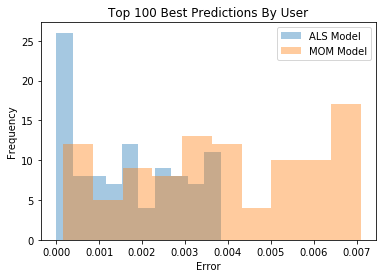

In [29]:
plt.hist(als_best.err, label = 'ALS Model', alpha=0.4)
plt.hist(mom_best.err, label = 'MOM Model', alpha=0.4)
plt.title("Top 100 Best Predictions By User")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()

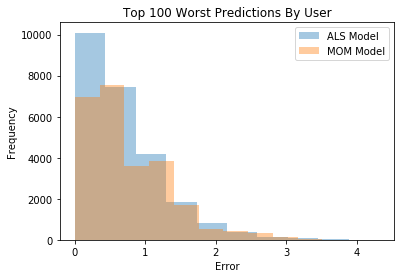

In [34]:
plt.hist(als_df.err, label = 'ALS Model', alpha=0.4)
plt.hist(mom_df.err, label = 'MOM Model', alpha=0.4)
plt.title("Top 100 Worst Predictions By User")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()

In [116]:
als_df['est_mapped'] = als_df.est.apply(lambda x: 1 if myround(x) >=3.5 else 0)
als_df['rui_mapped'] = als_df.rui.apply(lambda x: 1 if myround(x) >=3.5 else 0)

mom_df['est_mapped'] = mom_df.est.apply(lambda x: 1 if myround(x) >=3.5 else 0)
mom_df['rui_mapped'] = mom_df.rui.apply(lambda x: 1 if myround(x) >=3.5 else 0)

In [117]:
als_fps = als_df[(als_df.est_mapped == 1) & (als_df.rui_mapped == 0)].shape[0]
mom_fps = mom_df[(mom_df.est_mapped == 1) & (mom_df.rui_mapped == 0)].shape[0]

als_tps = als_df[(als_df.est_mapped == 1) & (als_df.rui_mapped == 1)].shape[0]
mom_tps = mom_df[(mom_df.est_mapped == 1) & (mom_df.rui_mapped == 1)].shape[0]

In [118]:
als_fps, mom_fps

(4688, 6936)

In [119]:
mom_precision = mom_tps/(mom_tps + mom_fps)
als_precision = als_tps/(als_tps + als_fps)

In [120]:
mom_precision

0.6824757370444974

In [121]:
als_precision

0.7403057832927099

Text(0.05,0.95,'The ALS Difference')

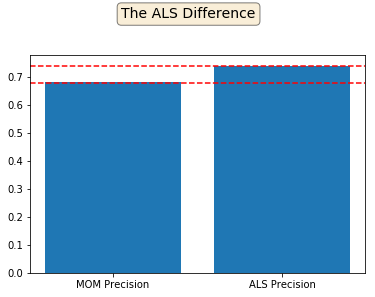

In [136]:
plt.bar(['MOM Precision', 'ALS Precision'],[mom_precision, als_precision])
plt.axhline(y=0.74, linestyle='--', color='red')
plt.axhline(y=0.68, linestyle='--', color='red')

textstr = 'The ALS Difference'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
